<a href="https://colab.research.google.com/github/rlehrter-blm/Drought-Tools/blob/main/1YearSPI_GRIDMET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explanation of Gridmet data and the SPI:

In [3]:
#Import/Install Packages
import datetime
import os
import requests
import time
      
!pip install --quiet geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 59.4 MB/s eta 0:00:00


In [4]:
# Set root URL for API requests
root_url = 'https://api.climateengine.org/'
# Authentication info for the API (INSERT YOUR OWN KEY)
headers = {'Authorization': ''}

In [5]:
#Set up start and end dates (1 year ago to today)
today = datetime.date.today()

delta = datetime.timedelta(days=365)
days_ago_365 = today - delta

today = today.strftime('%Y-%m-%d')

days365 = days_ago_365.strftime('%Y-%m-%d')

In [6]:
#1 Year SPI from GRIDMET
# Endpoint
endpoint1 = 'timeseries/native/points'

# Set up parameters for API call
params1 = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'spi1y',
    'start_date': days365,
    'end_date': today,
    'coordinates': '[[-121.98,39.03]]',
    'area_reducer': 'mean'
}
# Send request to the API
r1 = requests.get(root_url + endpoint1, params=params1, headers=headers, verify=False)
response1 = r1.json()

In [8]:
#response (may need to unpack with [] around timeseries the first time)
[timeseries] = response1

#Select Data
data = timeseries['Data']

# Convert to dataframe
df1 = pd.DataFrame.from_dict(data)
print(df1)

#Export CSV
#df1.to_csv('ltb_mean_42year.csv')

#Filter out non-available data i.e. values of -9999.000
df2 = df1[df1['spi1y']>-10]

#Format dates for plotting
df2['Date'] = pd.to_datetime(df2['Date'])

#Set x values to date variable
date1 = df2['Date']

#Set y values to value variable
value1 = df2['spi1y']

          Date  spi1y
0   2022-03-31  -1.45
1   2022-04-05  -1.28
2   2022-04-10  -1.28
3   2022-04-15  -1.01
4   2022-04-20  -1.13
..         ...    ...
67  2023-03-01   0.32
68  2023-03-06   0.47
69  2023-03-11   0.63
70  2023-03-16   0.80
71  2023-03-21   1.01

[72 rows x 2 columns]


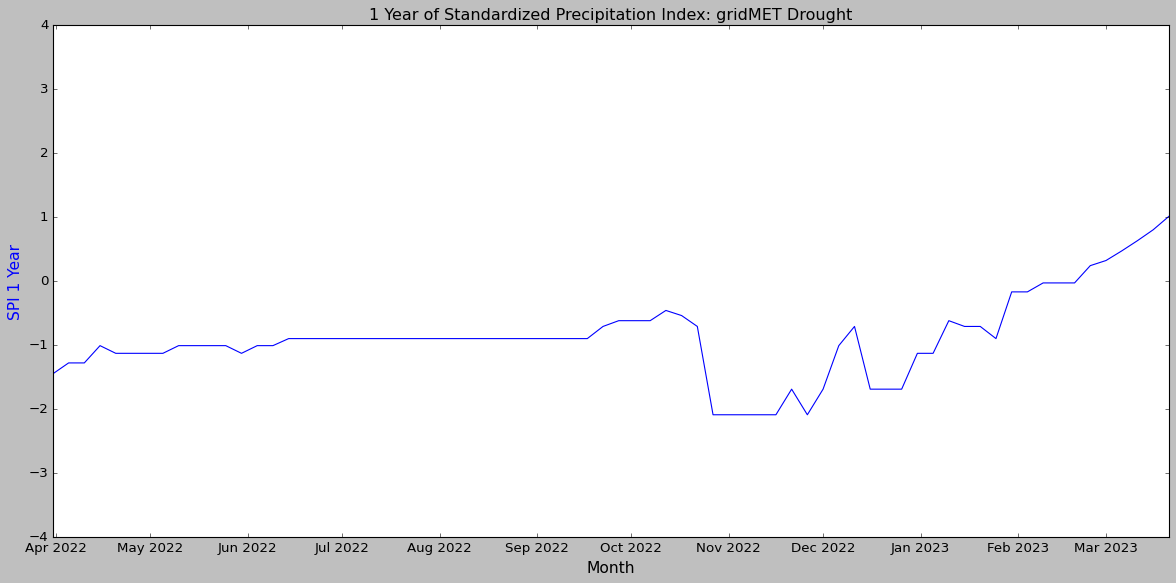

In [9]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,8))

# make a plot
ax.plot(date1, value1, color="blue")

#Change Y1 Scale
ax.set_ylim(-4,4)

#Add x-axis label
ax.set_xlabel("Month", fontsize = 14)

#Add y-axis label
ax.set_ylabel("SPI 1 Year", color="blue", fontsize=14)

#Change Y steps and labels
y = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
ticks = ['No drought', 'D0 - Abnormally Dry', 'D1 - Moderate Drought', 'D2 - Severe Drought', 'D3 - Extreme Drought', 'D4 - Exceptional Drought']
plt.yticks(y, ticks)

#Add Title
plt.title('1 Year of Standardized Precipitation Index: gridMET Drought')

#Export Graph
plt.savefig('SPI.png', bbox_inches='tight')

#Show Graph
plt.show()

How to interpret SPI values:
* 2.0 or more (extremely wet)
* 1.6 to 1.99 (very wet)
* 1.3 to 1.59 (moderately wet)
* 0.8 to 1.29 (slightly wet)
* 0.5 to 0.79 (incipient wet spell)
* -0.49 to 0.49(near normal),
* -0.79 to -0.5 (incipient dry spell)
* -1.29 to -0.8 (mild drought)
* -1.59 to -1.3 (moderate drought)
* -1.99 to -1.6 (severe drought)
* -2.0 or less (extreme drought)